In [47]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gdp-per-capita-all-countries/GDP.csv
/kaggle/input/code-country/Metadata_Country_API_NY.GDP.PCAP.CD_DS2_en_csv_v2_4578209.csv
/kaggle/input/world-population-dataset/world_population.csv
/kaggle/input/world-population-dataset/List of the Countries and Territories.txt
/kaggle/input/gdp-per-capita/main one.csv
/kaggle/input/world-population-19602018/population_total_long.csv
/kaggle/input/world-population-19602018/pop_worldometer_data.csv
/kaggle/input/world-population-19602018/population_above_age_65_percentage_long.csv
/kaggle/input/world-population-19602018/population_female_percentage_long.csv
/kaggle/input/world-population-19602018/population_below_age_14_percentage_long.csv
/kaggle/input/world-population-19602018/population_density_long.csv


In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
import plotly.express as px
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

In [49]:
pop=pd.read_csv('../input/world-population-dataset/world_population.csv')

gdp=pd.read_csv("../input/gdp-per-capita-all-countries/GDP.csv")

## Basic Exploration

In [50]:
pop.head()

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


In [51]:
gdp.head(10)

,Country,Country Code,1990,1991,1992,1993,1994,1995,1996,1997,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,24101.109430,25870.755940,26533.343900,27430.752400,28656.520210,28648.990020,28499.089430,30215.949230,...,33732.847450,35492.618490,35498.982090,37419.892820,38223.372260,38249.054870,38390.271650,39454.629830,NaN,NaN
1,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1637.377987,1626.764793,1806.763930,1874.765634,1897.525938,1886.692977,1896.992520,1934.636754,1955.006208,NaN
2,Angola,AGO,3089.683369,3120.356148,2908.160798,2190.768160,2195.532289,2496.199493,2794.896906,2953.342709,...,6230.297028,6346.395122,6772.528333,6980.423038,7199.245478,7096.600615,6756.935074,6650.584940,6452.355165,NaN
3,Albania,ALB,2549.473022,1909.114038,1823.307673,2057.449657,2289.873135,2665.764906,2980.066288,2717.362124,...,9628.025783,10207.752350,10526.235450,10571.010650,11259.225890,11662.030480,11868.178970,12930.140030,13364.155400,NaN
4,Arab World,ARB,6808.206995,6872.273195,7255.328362,7458.647059,7645.682856,7774.207360,8094.149842,8397.515692,...,14127.778020,14518.827450,15423.465390,15824.780110,16153.244860,16501.792590,16935.383300,17099.889390,17570.137600,NaN
5,United Arab Emirates,ARE,72906.520120,71753.729560,71567.827520,70082.389330,72471.687290,74994.380620,76848.792240,80390.064110,...,54230.173670,56574.288180,58961.202010,62641.836990,66443.997580,70212.093010,72386.090470,73137.870190,75075.257410,NaN
6,Argentina,ARG,7380.115031,8210.643432,8942.569853,9777.214005,10435.910770,10225.118710,10857.429670,11802.842590,...,18524.856760,19817.450480,19764.225010,20365.613350,20008.320640,20551.833190,20130.408030,20843.155070,20610.568550,NaN
7,Armenia,ARM,2428.558960,2237.752728,1356.210786,1296.178498,1429.102386,1591.894846,1742.734114,1852.200102,...,6565.678660,7019.767748,7649.061531,8003.087763,8405.073655,8727.385447,8808.572714,9620.818491,10343.175590,NaN
8,Antigua and Barbuda,ATG,11326.702620,11806.234410,12005.986790,12682.475350,13524.670290,12924.355370,13729.757550,14416.114870,...,20134.817250,19876.215320,20672.912060,20656.381580,21599.199140,22422.029390,23670.302260,24644.551880,26868.133520,NaN
9,Australia,AUS,17329.706610,17790.980140,18189.378740,19131.841870,20064.459010,20894.397210,21972.052650,22934.786010,...,39324.368950,41965.358420,42826.789580,45902.047950,46880.220660,46276.150690,47305.880020,49628.811810,51663.365090,NaN


In [52]:
pop.isnull().sum() # Checking For Null Values

Rank                           0
CCA3                           0
Country                        0
Capital                        0
Continent                      0
2022 Population                0
2020 Population                0
2015 Population                0
2010 Population                0
2000 Population                0
1990 Population                0
1980 Population                0
1970 Population                0
Area (km²)                     0
Density (per km²)              0
Growth Rate                    0
World Population Percentage    0
dtype: int64

In [53]:
gdp.isnull().sum()

Country           0
Country Code      0
1990             51
1991             49
1992             47
1993             45
1994             42
1995             36
1996             36
1997             35
1998             34
1999             33
2000             24
2001             23
2002             22
2003             22
2004             22
2005             22
2006             22
2007             21
2008             20
2009             19
2010             19
2011             17
2012             19
2013             19
2014             20
2015             22
2016             22
2017             22
2018             29
2019            260
dtype: int64

### Separating 12 random countries.

In [54]:
capita=gdp.loc[gdp['Country '].isin(["Australia","United States Of America","India","China","Japan","Bangladesh","United Kingdom","Brazil","Germany","Egypt","Sudan","Malaysia","Niger","Chad"])]
capita.reset_index(drop=True,inplace=True)
capita

,Country,Country Code,1990,1991,1992,1993,1994,1995,1996,1997,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Australia,AUS,17329.706610,17790.980140,18189.378740,19131.841870,20064.459010,20894.397210,21972.052650,22934.786010,...,39324.368950,41965.358420,42826.789580,45902.047950,46880.220660,46276.150690,47305.880020,49628.811810,51663.365090,NaN
1,Bangladesh,BGD,860.210510,899.142124,948.272147,994.673733,1033.086949,1085.349904,1130.860059,1176.895726,...,2466.902949,2650.729933,2844.702565,3033.404632,3240.885623,3451.398507,3696.776193,3998.419424,4371.754986,NaN
2,Brazil,BRA,6710.964526,6919.981067,6925.379871,7297.683777,7723.899622,8102.668550,8300.244709,8594.561343,...,14320.368690,15061.953190,15506.554260,16111.442680,16358.390770,15813.855440,15331.548520,15662.240470,16096.400960,NaN
3,China,CHN,987.641179,1100.814276,1270.296992,1463.801748,1671.200917,1872.606651,2074.361670,2281.443841,...,9303.733700,10355.495710,11328.281710,12361.397970,13446.402390,14454.997970,15513.273040,16782.207760,18236.612980,NaN
4,Germany,DEU,19496.787400,21031.948890,21762.855050,21863.311760,22759.997750,23528.148880,24047.761370,24570.112410,...,38949.549760,42541.531090,43359.614830,44993.892750,47011.551090,47683.788600,49516.082690,52055.309950,53074.540120,NaN
5,United Kingdom,GBR,16698.341760,17022.742340,17428.601160,18248.570160,19312.176900,20522.313750,21851.848230,23039.947800,...,36340.733870,37161.490690,38311.846080,39971.025360,41259.000940,42509.888170,43543.587830,45378.997740,45973.573500,NaN
6,India,IND,1236.671208,1265.917481,1338.664595,1407.473802,1503.745417,1620.175387,1741.084404,1808.708364,...,4360.154050,4624.561404,4909.584076,5252.272397,5682.731285,6133.887015,6634.844574,7168.992484,7762.881770,NaN
7,Japan,JPN,19561.201740,20849.017680,21451.674130,21792.335480,22402.266430,23409.640290,24515.116280,25146.200430,...,34986.994540,35774.696710,37191.385950,38974.079490,39179.155610,40396.243210,41118.078040,41958.962160,42797.458520,NaN
8,Malaysia,MYS,6850.467599,7552.844003,8197.667959,8994.020079,9784.926785,10698.850390,11682.302460,12431.504220,...,20605.201110,21806.822790,23105.075290,24279.371690,25875.502670,27116.576260,28246.750550,30025.176550,31782.153360,NaN
9,Niger,NER,579.498688,594.676687,550.140182,552.410569,567.086066,573.908895,583.713884,589.055046,...,795.682826,799.258376,876.276000,902.662600,951.160587,964.838079,984.683134,1012.859196,1063.421841,NaN


In [55]:
gro_rate=pop.loc[pop["Country"].isin(["Australia","United States Of America","India","China","Japan","Bangladesh","United Kingdom","Brazil","Germany","Sudan","Malaysia","Niger","Chad"])]
gro_rate.reset_index(drop=True,inplace=True)
gro_rate

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,55,AUS,Australia,Canberra,Oceania,26177413,25670051,23820236,22019168,19017963,17048003,14706322,12595034,7692024,3.4032,1.0099,0.33
1,8,BGD,Bangladesh,Dhaka,Asia,171186372,167420951,157830000,148391139,129193327,107147651,83929765,67541860,147570,1160.0350,1.0108,2.15
2,7,BRA,Brazil,Brasilia,South America,215313498,213196304,205188205,196353492,175873720,150706446,122288383,96369875,8515767,25.2841,1.0046,2.70
3,69,TCD,Chad,N'Djamena,Africa,17723315,16644701,14140274,11894727,8259137,5827069,4408230,3667394,1284000,13.8032,1.0316,0.22
4,1,CHN,China,Beijing,Asia,1425887337,1424929781,1393715448,1348191368,1264099069,1153704252,982372466,822534450,9706961,146.8933,1.0000,17.88
5,19,DEU,Germany,Berlin,Europe,83369843,83328988,82073226,81325090,81551677,79370196,77786703,78294583,357114,233.4544,0.9995,1.05
6,2,IND,India,New Delhi,Asia,1417173173,1396387127,1322866505,1240613620,1059633675,870452165,696828385,557501301,3287590,431.0675,1.0068,17.77
7,11,JPN,Japan,Tokyo,Asia,123951692,125244761,127250933,128105431,126803861,123686321,117624196,105416839,377930,327.9753,0.9947,1.55
8,45,MYS,Malaysia,Kuala Lumpur,Asia,33938221,33199993,31068833,28717731,22945150,17517054,13215707,10306508,330803,102.5934,1.0109,0.43
9,54,NER,Niger,Niamey,Africa,26207977,24333639,20128124,16647543,11622665,8370647,6173177,4669708,1267000,20.6851,1.0378,0.33


## Exploratory Data Analysis

Text(0.5, 0.98, 'Growth Rate vs Capita')

<Figure size 1440x720 with 0 Axes>

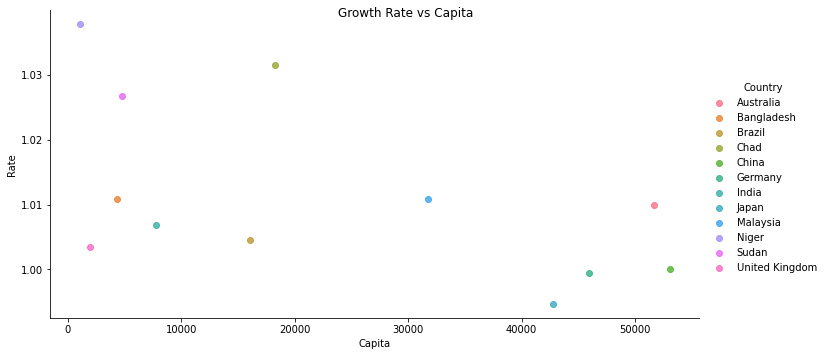

In [105]:
x1=pd.DataFrame()
x1["Country"]=gro_rate["Country"]
x1["Rate"]=gro_rate["Growth Rate"]
x1["Capita"]=capita["2018"]
plt.figure(figsize=(20,10))
ax=sns.lmplot(x="Capita",y="Rate",hue="Country",data=x1,height=5,aspect=2)
ax.fig.suptitle('Growth Rate vs Capita')

### Most of the countries having low GDP per capita have relatively higher growth rate than most high GDP per capita countries on average.

## 1990

Text(0.5, 0.98, 'Pop vs Capita')

<Figure size 1440x720 with 0 Axes>

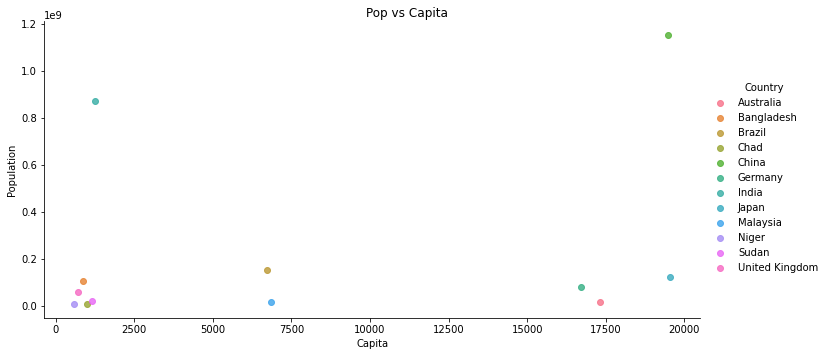

In [99]:
x2=pd.DataFrame()
x2["Country"]=gro_rate["Country"]
x2["Population"]=gro_rate["1990 Population"]
x2["Capita"]=capita["1990"]
plt.figure(figsize=(20,10))
ax=sns.lmplot(x="Capita",y="Population",hue="Country",data=x2,height=5,aspect=2)
ax.fig.suptitle('Pop vs Capita')

## 2000

Text(0.5, 0.98, 'Pop vs Capita')

<Figure size 1440x720 with 0 Axes>

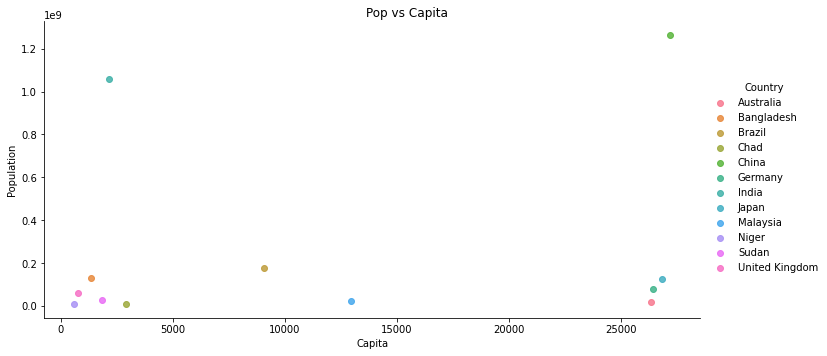

In [100]:
x3=pd.DataFrame()
x3["Country"]=gro_rate["Country"]
x3["Population"]=gro_rate["2000 Population"]
x3["Capita"]=capita["2000"]
plt.figure(figsize=(20,10))
ax=sns.lmplot(x="Capita",y="Population",hue="Country",data=x3,height=5,aspect=2)
ax.fig.suptitle('Pop vs Capita')

## 2010

Text(0.5, 0.98, 'Pop vs Capita')

<Figure size 1440x720 with 0 Axes>

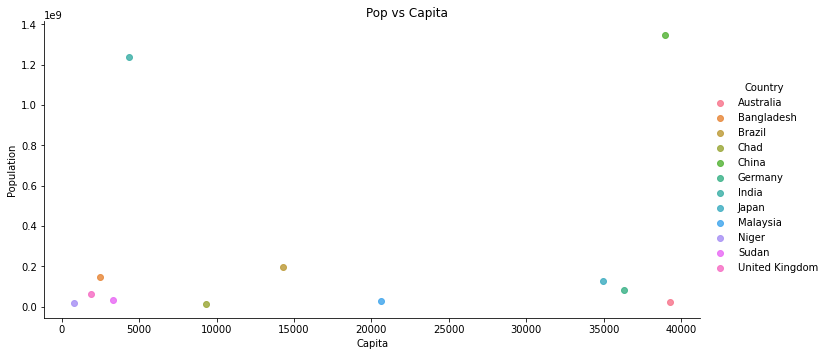

In [101]:
x2=pd.DataFrame()
x2["Country"]=gro_rate["Country"]
x2["Population"]=gro_rate["2010 Population"]
x2["Capita"]=capita["2010"]
plt.figure(figsize=(20,10))
ax=sns.lmplot(x="Capita",y="Population",hue="Country",data=x2,height=5,aspect=2)
ax.fig.suptitle('Pop vs Capita')

## 2015

<Figure size 1440x720 with 0 Axes>

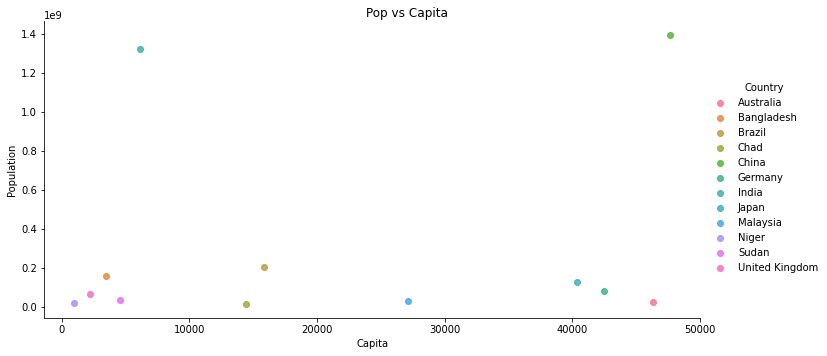

In [103]:
x2=pd.DataFrame()
x2["Country"]=gro_rate["Country"]
x2["Population"]=gro_rate["2015 Population"]
x2["Capita"]=capita["2015"]
plt.figure(figsize=(20,10))
ax=sns.lmplot(x="Capita",y="Population",hue="Country",data=x2,height=5,aspect=2)
ax=ax.fig.suptitle('Pop vs Capita')

## Conclusions
#### Malaysia and Chad over the years have improved their GDP per capita, by a significantly huge margin.
#### China nearly doubled it's GDP per capita rate within a span of 25 years, India on the otherhand has remained largely in the 10000 dollars category , improving slightly over the years.
